<a href="https://colab.research.google.com/github/DianaDoosti-PouyanBahmani/Intelligent_Systems_Final/blob/main/Project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

y = y.squeeze()

In [ ]:
df = pd.concat([X, y], axis=1)

df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#EDA

In [ ]:
# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)

print(y.value_counts(normalize=True))

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

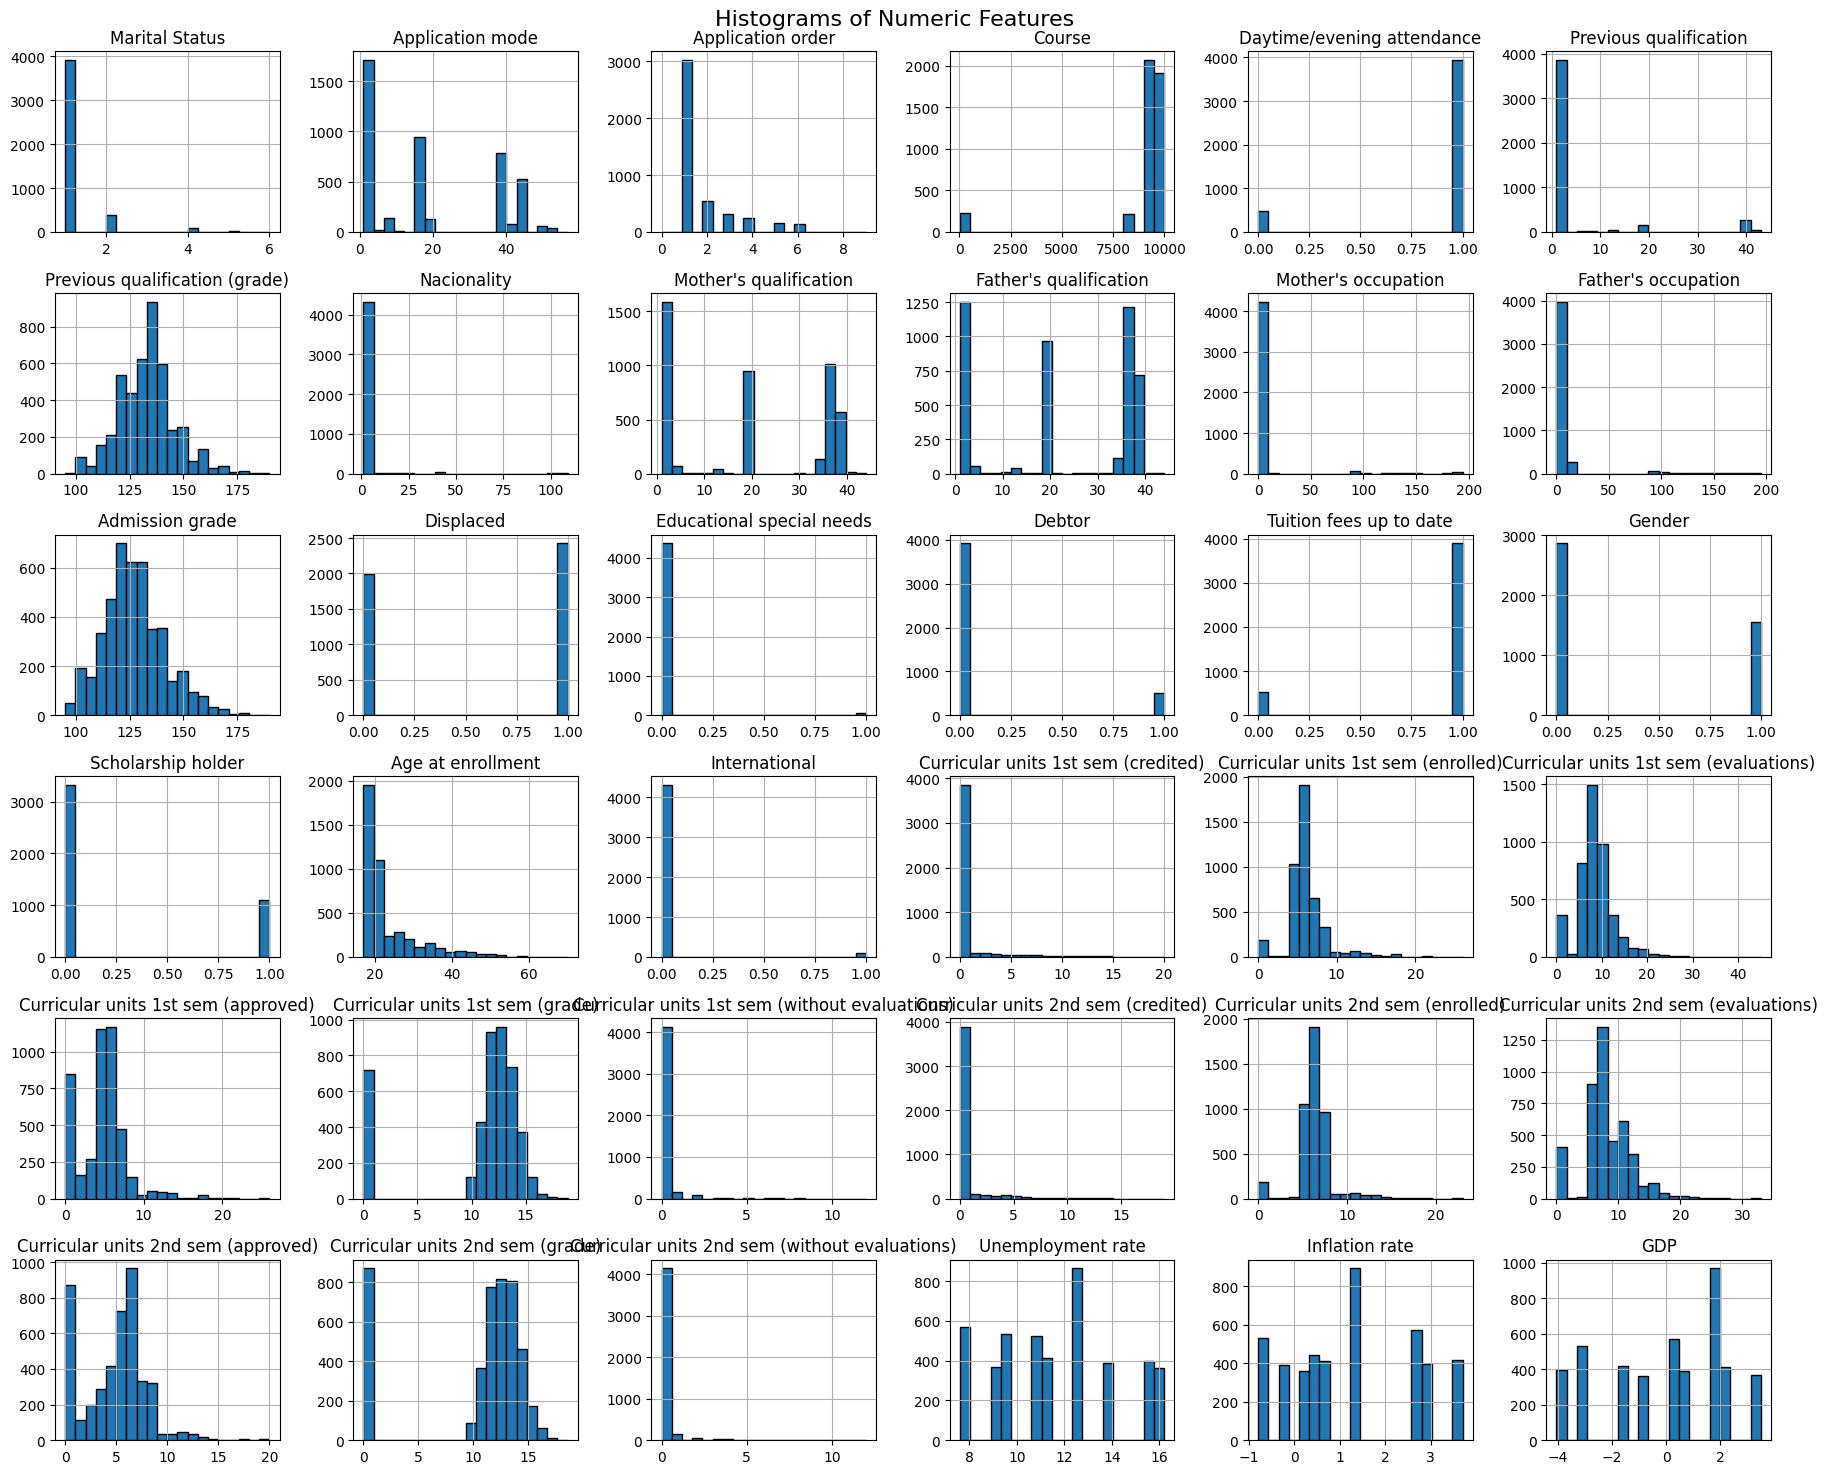

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols].hist(
    figsize=(18, 15),
    bins=20,
    edgecolor="black"
)

plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

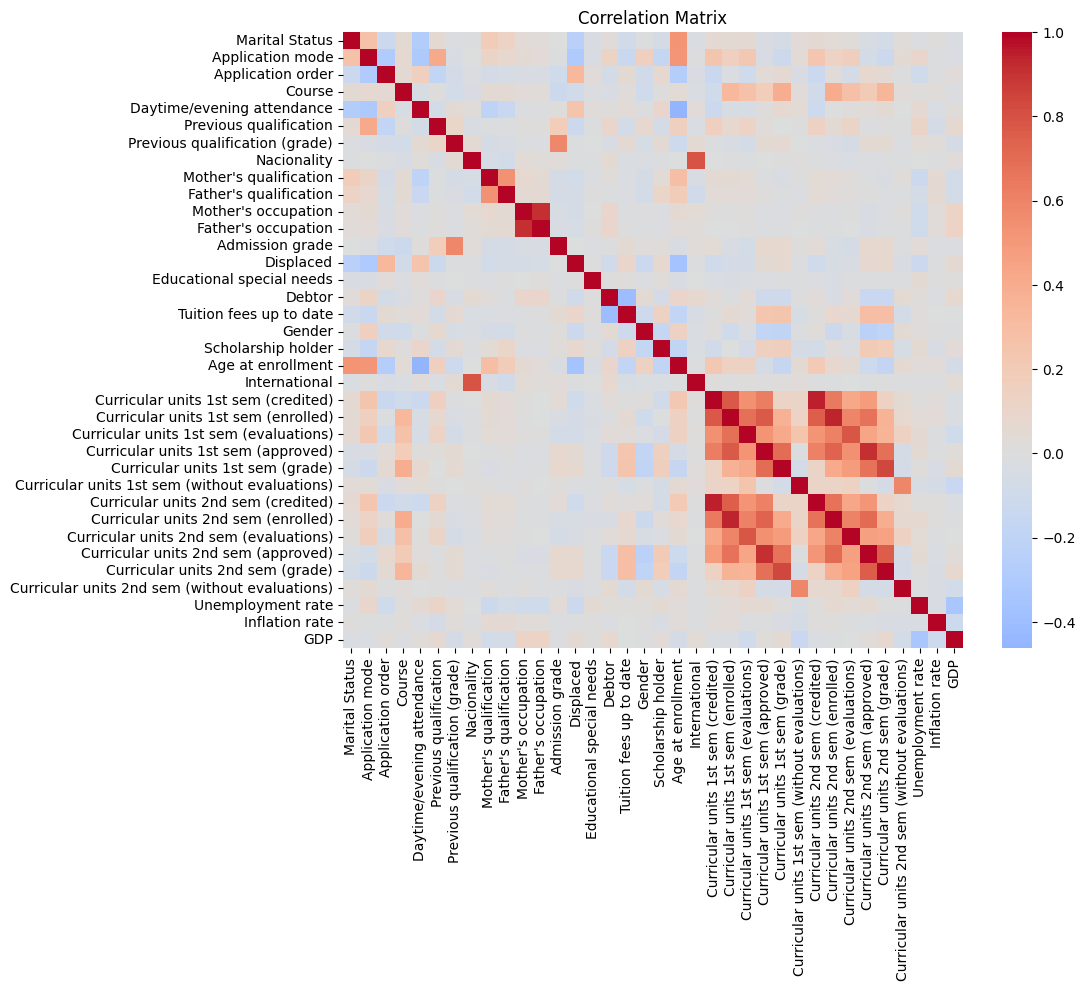

Curricular units 1st sem (credited)             Curricular units 2nd sem (credited)               0.944811
Curricular units 1st sem (enrolled)             Curricular units 2nd sem (enrolled)               0.942627
Mother's occupation                             Father's occupation                               0.910472
Curricular units 1st sem (approved)             Curricular units 2nd sem (approved)               0.904002
Curricular units 1st sem (grade)                Curricular units 2nd sem (grade)                  0.837170
Nacionality                                     International                                     0.790935
Curricular units 1st sem (evaluations)          Curricular units 2nd sem (evaluations)            0.778863
Curricular units 1st sem (credited)             Curricular units 1st sem (enrolled)               0.774344
Curricular units 1st sem (enrolled)             Curricular units 1st sem (approved)               0.769083
Curricular units 2nd sem (approved)  

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Select upper triangle of correlation matrix
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Convert to sorted series
sorted_correlations = (
    upper_triangle
    .stack()
    .abs()
    .sort_values(ascending=False)
)

print(sorted_correlations.head(30))

#Trian/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3539, 36)
Test shape: (885, 36)


#Preprocessing/Feature Reduction

##Pipeline 1: StandardScaler (No PCA)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_no_pca = Pipeline([
    ("scaler", StandardScaler())
])

X_train_scaled = pipeline_no_pca.fit_transform(X_train)
X_test_scaled  = pipeline_no_pca.transform(X_test)

##Pipeline 2: StandardScaler + PCA

In [ ]:
pipeline_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.90, random_state=42))
])

X_train_pca = pipeline_pca.fit_transform(X_train)
X_test_pca  = pipeline_pca.transform(X_test)

print("Original features:", X_train.shape[1])
print("After PCA:", X_train_pca.shape[1])

Original features: 36
After PCA: 22


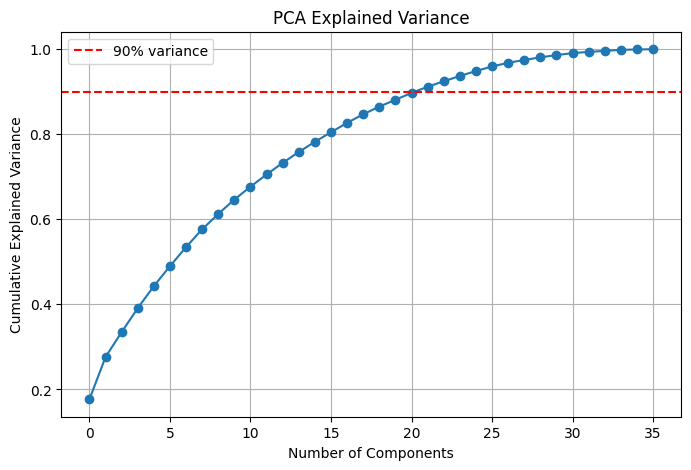

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale first
scaler = StandardScaler()
X_train_scaled_for_plot = scaler.fit_transform(X_train)

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X_train_scaled_for_plot)

# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(
    np.cumsum(pca_full.explained_variance_ratio_),
    marker='o'
)

plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.legend()
plt.grid()
plt.show()


##Pipeline 3: StandardScaler + LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Scale first (important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)

print("Original shape:", X_train.shape)
print("After LDA shape:", X_train_lda.shape)

Original shape: (3539, 36)
After LDA shape: (3539, 2)


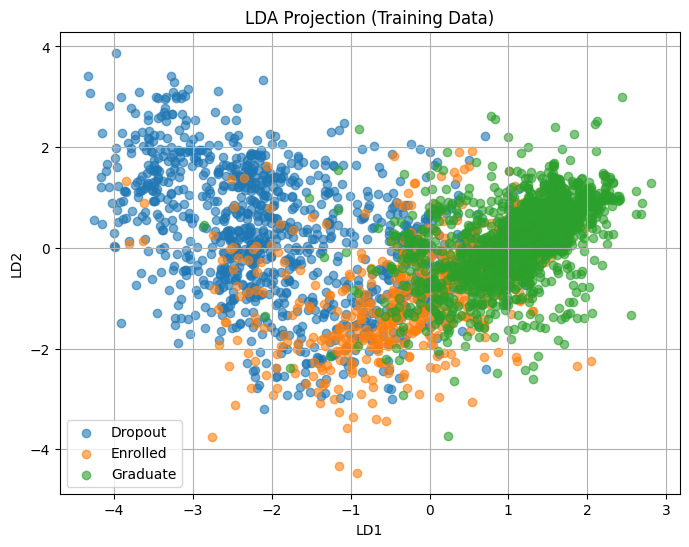

In [ ]:
plt.figure(figsize=(8,6))

classes = np.unique(y_train)

for cls in classes:
    plt.scatter(
        X_train_lda[y_train == cls, 0],
        X_train_lda[y_train == cls, 1],
        label=cls,
        alpha=0.6
    )

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection (Training Data)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
print("Explained variance ratio:", lda.explained_variance_ratio_)

Explained variance ratio: [0.91506132 0.08493868]


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=42
)

#SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)


##Class Definition

In [ ]:
class SVMExperiment:

    def __init__(self, use_scaler=True, use_pca=False, use_lda=False, cv=None):
        self.use_pca = use_pca
        self.use_lda = use_lda
        self.use_scaler = use_scaler
        self.cv = cv
        self.model = None
        self.X_train = None
        self.y_train = None


        if self.use_pca and self.use_lda:
            raise ValueError("Use either PCA or LDA, not both.")

    # -------------------------------------------------
    # Build Pipeline
    # -------------------------------------------------
    def build_pipeline(self):

        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        from sklearn.svm import SVC

        steps = []

        if self.use_scaler:
            steps.append(("scaler", StandardScaler()))

        if self.use_pca:
            steps.append(("pca", PCA(n_components=0.90, random_state=42)))

        if self.use_lda:
            steps.append(("lda", LinearDiscriminantAnalysis()))

        steps.append((
            "svm",
            SVC(
                kernel="rbf",
                probability=True,
                class_weight="balanced"
            )
        ))

        return Pipeline(steps)

    # -------------------------------------------------
    # Train
    # -------------------------------------------------
    def train(self, X_train, y_train):

        import time
        from sklearn.model_selection import GridSearchCV

        self.X_train = X_train
        self.y_train = y_train.ravel()

        param_grid = {
            "svm__C": [0.1, 1, 10],
            "svm__gamma": [0.01, 0.1]
        }

        pipeline = self.build_pipeline()

        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=self.cv,
            scoring="f1_macro",
            n_jobs=-1
        )

        start_time = time.time()
        grid.fit(self.X_train, self.y_train)
        end_time = time.time()

        self.model = grid.best_estimator_

        print("Best parameters:", grid.best_params_)
        print("Best CV F1-macro:", grid.best_score_)
        print("Training time: {:.4f} seconds".format(end_time - start_time))

    # -------------------------------------------------
    # Evaluate + Plots
    # -------------------------------------------------
    def evaluate(self, X_test, y_test):

        import time
        import numpy as np
        import matplotlib.pyplot as plt
        from sklearn.metrics import (
            classification_report,
            precision_score,
            recall_score,
            f1_score,
            roc_auc_score,
            confusion_matrix,
            ConfusionMatrixDisplay,
            roc_curve,
            auc
        )
        from sklearn.preprocessing import label_binarize
        from sklearn.model_selection import learning_curve

        y_test = y_test.ravel()

        # -------- Prediction Time --------
        start_time = time.time()
        y_pred = self.model.predict(X_test)
        y_prob = self.model.predict_proba(X_test)
        end_time = time.time()

        print("Prediction time: {:.6f} seconds".format(end_time - start_time))

        # ---------------- Metrics ----------------
        print("\nTest Metrics:")
        print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
        print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
        print("F1-score (macro):", f1_score(y_test, y_pred, average="macro"))
        print("ROC-AUC (OvR):", roc_auc_score(y_test, y_prob, multi_class="ovr"))

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # ---------------- Confusion Matrix ----------------
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title("Confusion Matrix")
        plt.show()

        # ---------------- ROC Curve (Multi-class) ----------------
        classes = np.unique(y_test)
        y_test_bin = label_binarize(y_test, classes=classes)

        plt.figure(figsize=(8,6))

        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (Multi-class)")
        plt.legend()
        plt.show()

        # ---------------- Learning Curve (FIXED) ----------------
        train_sizes, train_scores, val_scores = learning_curve(
            self.model,
            self.X_train,
            self.y_train,
            cv=self.cv,
            scoring="f1_macro",
            n_jobs=-1
        )

        train_mean = train_scores.mean(axis=1)
        val_mean = val_scores.mean(axis=1)

        plt.figure(figsize=(8,6))
        plt.plot(train_sizes, train_mean, label="Training score")
        plt.plot(train_sizes, val_mean, label="Validation score")
        plt.xlabel("Training Size")
        plt.ylabel("F1 Macro")
        plt.title("Learning Curve")
        plt.legend()
        plt.show()


##Unscaled

/tmp/ipython-input-2398904477.py:58: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.y_train = y_train.ravel()


Best parameters: {'svm__C': 1, 'svm__gamma': 0.01}
Best CV F1-macro: 0.43218989563087384
Training time: 71.8449 seconds


/tmp/ipython-input-2398904477.py:107: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


Prediction time: 0.630703 seconds

Test Metrics:
Precision (macro): 0.4940574630365562
Recall (macro): 0.4848300318239822
F1-score (macro): 0.4524726780777817
ROC-AUC (OvR): 0.703865678343008

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.46      0.82      0.59       284
    Enrolled       0.29      0.11      0.16       159
    Graduate       0.73      0.53      0.61       442

    accuracy                           0.55       885
   macro avg       0.49      0.48      0.45       885
weighted avg       0.56      0.55      0.52       885



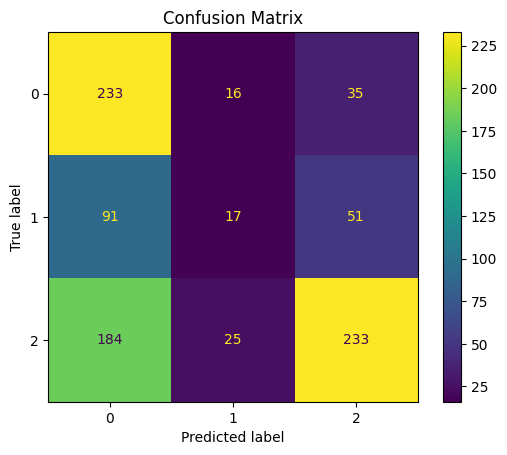

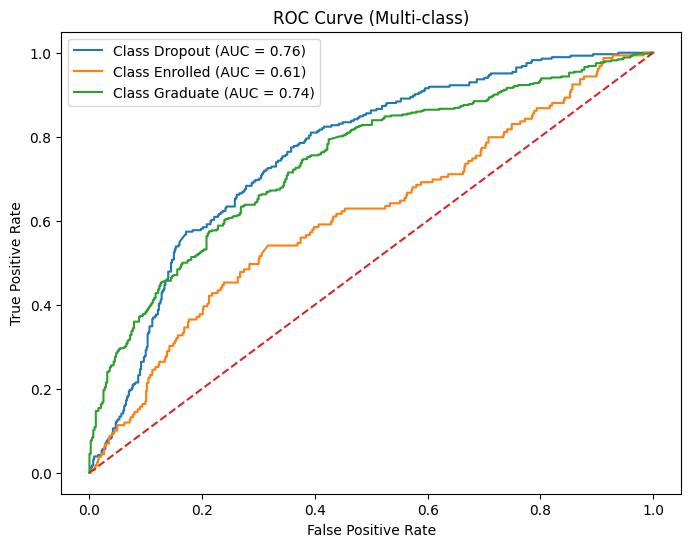

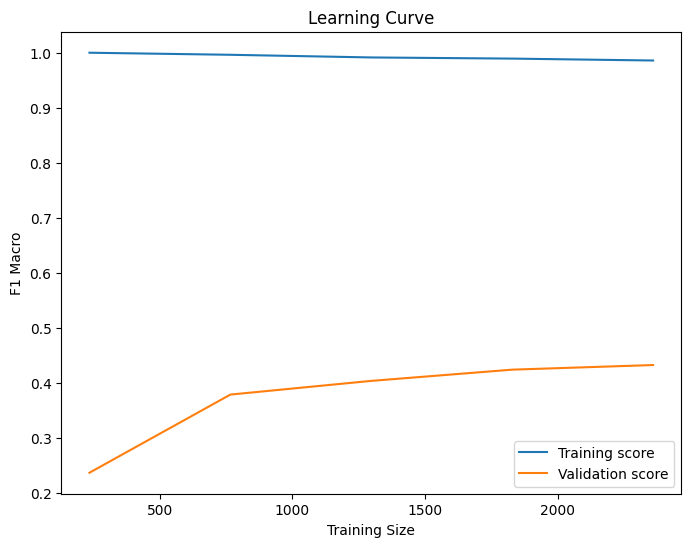

In [ ]:
svm_base_unscaled = SVMExperiment(use_scaler=False, use_pca=False, use_lda=False, cv=cv)
svm_base_unscaled.train(X_train, y_train)
svm_base_unscaled.evaluate(X_test, y_test)

##Scaled

/tmp/ipython-input-2398904477.py:58: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.y_train = y_train.ravel()


Best parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best CV F1-macro: 0.699022948577991
Training time: 45.4964 seconds


/tmp/ipython-input-2398904477.py:107: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


Prediction time: 0.320636 seconds

Test Metrics:
Precision (macro): 0.6757162810167398
Recall (macro): 0.6721196917887605
F1-score (macro): 0.6627154820261437
ROC-AUC (OvR): 0.8680839730128437

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.65      0.72       284
    Enrolled       0.38      0.59      0.46       159
    Graduate       0.84      0.77      0.80       442

    accuracy                           0.70       885
   macro avg       0.68      0.67      0.66       885
weighted avg       0.75      0.70      0.72       885



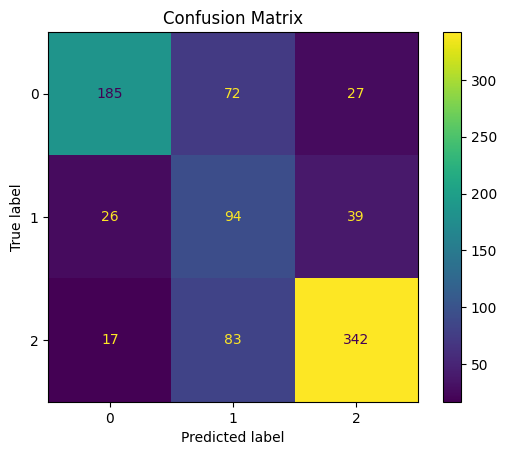

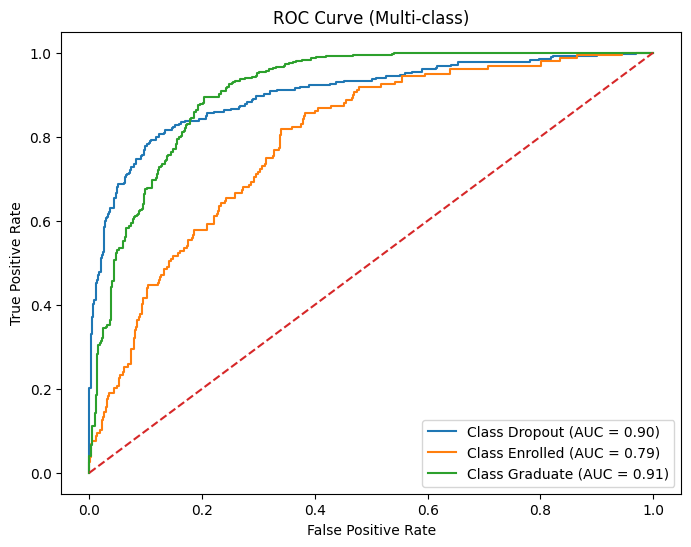

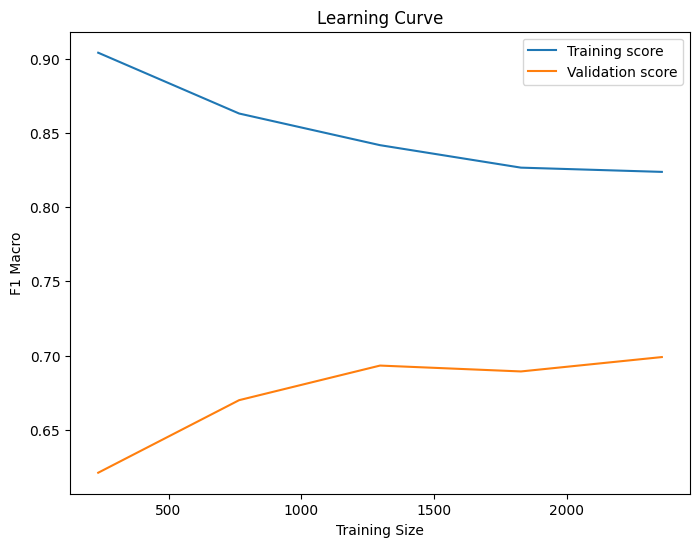

In [ ]:
svm_base = SVMExperiment(use_pca=False, use_lda=False, cv=cv)
svm_base.train(X_train, y_train)
svm_base.evaluate(X_test, y_test)

##PCA

/tmp/ipython-input-1547061136.py:53: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.y_train = y_train.ravel()


Best parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best CV F1-macro: 0.685778597558334
Training time: 38.4412 seconds


/tmp/ipython-input-1547061136.py:102: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


Prediction time: 0.417871 seconds

Test Metrics:
Precision (macro): 0.684573288999723
Recall (macro): 0.6828566282772095
F1-score (macro): 0.6685179376176574
ROC-AUC (OvR): 0.8666385117586191

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.63      0.71       284
    Enrolled       0.39      0.65      0.49       159
    Graduate       0.85      0.77      0.80       442

    accuracy                           0.70       885
   macro avg       0.68      0.68      0.67       885
weighted avg       0.75      0.70      0.72       885



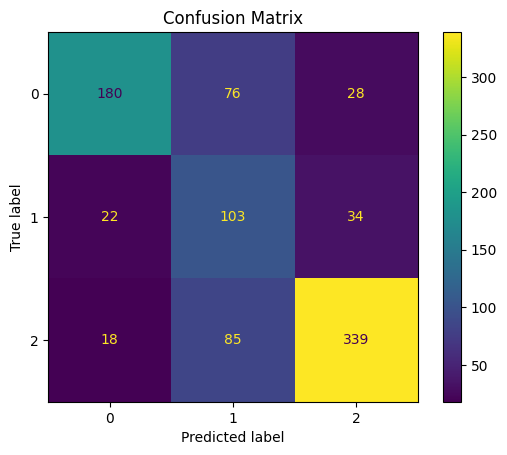

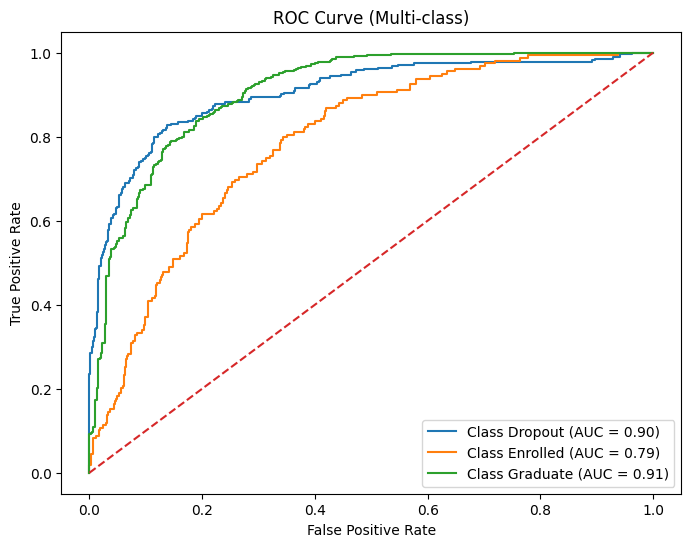

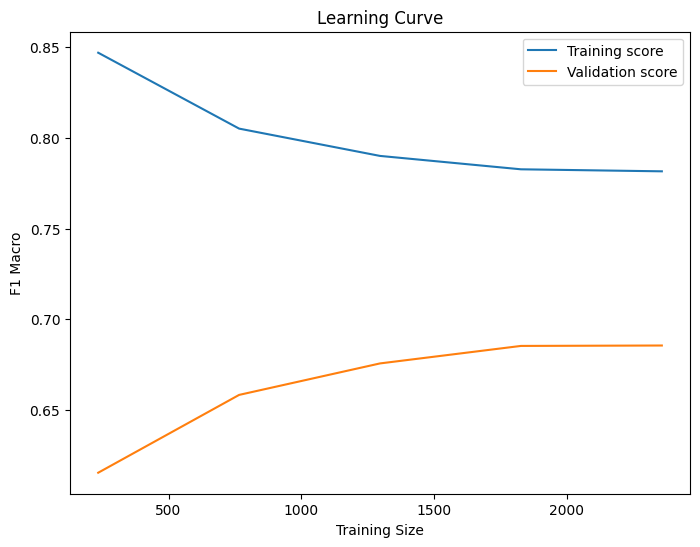

In [ ]:
svm_pca = SVMExperiment(use_pca=True, cv=cv)
svm_pca.train(X_train, y_train)
svm_pca.evaluate(X_test, y_test)

##LDA

/tmp/ipython-input-1547061136.py:53: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.y_train = y_train.ravel()


Best parameters: {'svm__C': 1, 'svm__gamma': 0.01}
Best CV F1-macro: 0.6913776813954428
Training time: 20.4339 seconds


/tmp/ipython-input-1547061136.py:102: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


Prediction time: 0.441363 seconds

Test Metrics:
Precision (macro): 0.7127396900446547
Recall (macro): 0.6996241753241018
F1-score (macro): 0.6836268001327008
ROC-AUC (OvR): 0.869899625083224

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.89      0.62      0.73       284
    Enrolled       0.39      0.69      0.50       159
    Graduate       0.86      0.79      0.82       442

    accuracy                           0.72       885
   macro avg       0.71      0.70      0.68       885
weighted avg       0.78      0.72      0.73       885



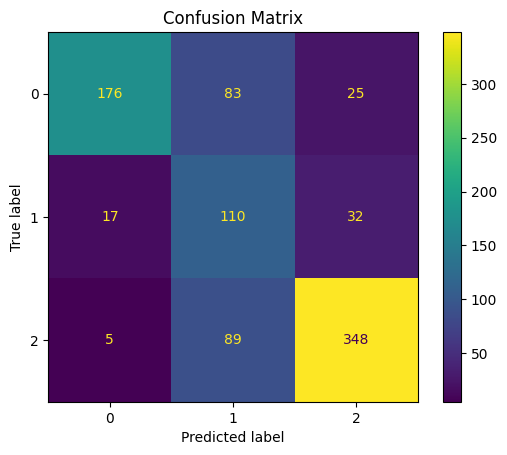

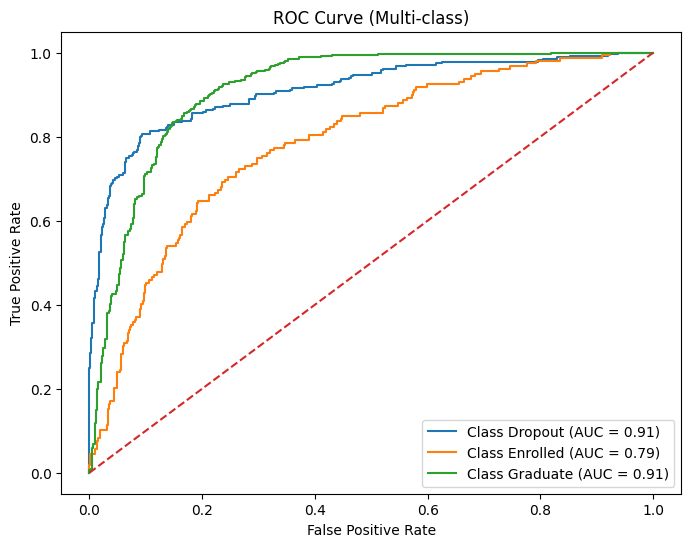

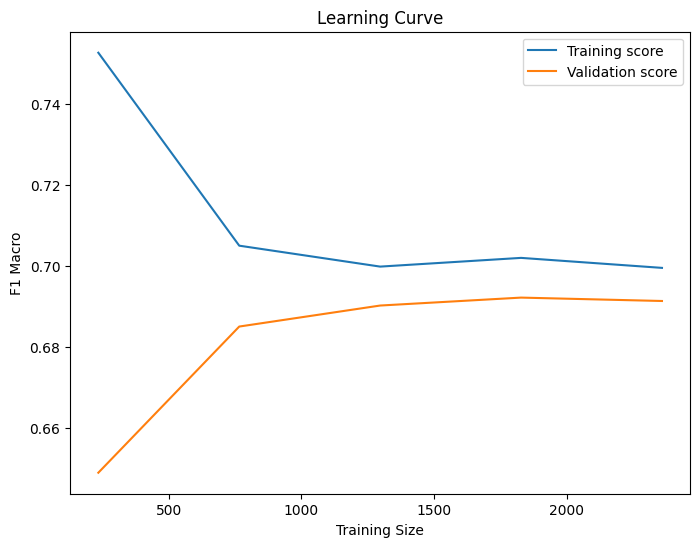

In [ ]:
svm_lda = SVMExperiment(use_lda=True, cv=cv)
svm_lda.train(X_train, y_train)
svm_lda.evaluate(X_test, y_test)

#Random Forest Model

##Class Definition

In [ ]:
class RandomForestExperiment:

    def __init__(self, use_scaler=True, use_pca=False, use_lda=False, cv=None):
        self.use_pca = use_pca
        self.use_lda = use_lda
        self.use_scaler = use_scaler
        self.cv = cv
        self.model = None
        self.X_train = None
        self.y_train = None

        if self.use_pca and self.use_lda:
            raise ValueError("Use either PCA or LDA, not both.")

    # -------------------------------------------------
    # Build Pipeline
    # -------------------------------------------------
    def build_pipeline(self):

        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA
        from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
        from sklearn.ensemble import RandomForestClassifier

        steps = []

        if self.use_scaler:
            steps.append(("scaler", StandardScaler()))

        if self.use_pca:
            steps.append(("pca", PCA(n_components=0.90, random_state=42)))

        if self.use_lda:
            steps.append(("lda", LinearDiscriminantAnalysis()))

        steps.append((
            "rf",
            RandomForestClassifier(
                class_weight="balanced",
                random_state=42
            )
        ))

        return Pipeline(steps)

    # -------------------------------------------------
    # Train
    # -------------------------------------------------
    def train(self, X_train, y_train):

        import time
        from sklearn.model_selection import GridSearchCV

        self.X_train = X_train
        self.y_train = y_train.ravel()

        param_grid = {
            "rf__n_estimators": [100, 200],
            "rf__max_depth": [None, 10, 20],
            "rf__min_samples_split": [2, 5],
            "rf__min_samples_leaf": [1, 2]
        }

        pipeline = self.build_pipeline()

        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=self.cv,
            scoring="f1_macro",
            n_jobs=-1
        )

        start_time = time.time()
        grid.fit(self.X_train, self.y_train)
        end_time = time.time()

        self.model = grid.best_estimator_

        print("Best parameters:", grid.best_params_)
        print("Best CV F1-macro:", grid.best_score_)
        print("Training time: {:.4f} seconds".format(end_time - start_time))

    # -------------------------------------------------
    # Evaluate + Plots
    # -------------------------------------------------
    def evaluate(self, X_test, y_test):

        import time
        import numpy as np
        import matplotlib.pyplot as plt
        from sklearn.metrics import (
            classification_report,
            precision_score,
            recall_score,
            f1_score,
            roc_auc_score,
            confusion_matrix,
            ConfusionMatrixDisplay,
            roc_curve,
            auc
        )
        from sklearn.preprocessing import label_binarize
        from sklearn.model_selection import learning_curve

        y_test = y_test.ravel()

        # -------- Prediction Time --------
        start_time = time.time()
        y_pred = self.model.predict(X_test)
        y_prob = self.model.predict_proba(X_test)
        end_time = time.time()

        print("Prediction time: {:.6f} seconds".format(end_time - start_time))

        # ---------------- Metrics ----------------
        print("\nTest Metrics:")
        print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
        print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
        print("F1-score (macro):", f1_score(y_test, y_pred, average="macro"))
        print("ROC-AUC (OvR):", roc_auc_score(y_test, y_prob, multi_class="ovr"))

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # ---------------- Confusion Matrix ----------------
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title("Confusion Matrix")
        plt.show()

        # ---------------- ROC Curve ----------------
        classes = np.unique(y_test)
        y_test_bin = label_binarize(y_test, classes=classes)

        plt.figure(figsize=(8,6))

        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (Multi-class)")
        plt.legend()
        plt.show()

        # ---------------- Learning Curve (FIXED) ----------------
        train_sizes, train_scores, val_scores = learning_curve(
            self.model,
            self.X_train,
            self.y_train,
            cv=self.cv,
            scoring="f1_macro",
            n_jobs=-1
        )

        train_mean = train_scores.mean(axis=1)
        val_mean = val_scores.mean(axis=1)

        plt.figure(figsize=(8,6))
        plt.plot(train_sizes, train_mean, label="Training score")
        plt.plot(train_sizes, val_mean, label="Validation score")
        plt.xlabel("Training Size")
        plt.ylabel("F1 Macro")
        plt.title("Learning Curve")
        plt.legend()
        plt.show()


##Unscaled

/tmp/ipython-input-1461389918.py:56: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.y_train = y_train.ravel()


Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best CV F1-macro: 0.7106205676898506
Training time: 59.0311 seconds
Prediction time: 0.104312 seconds

Test Metrics:
Precision (macro): 0.7074127980470807
Recall (macro): 0.7024517786972649
F1-score (macro): 0.7010448215276396
ROC-AUC (OvR): 0.8871349721263219

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.69      0.75       284
    Enrolled       0.46      0.56      0.50       159
    Graduate       0.83      0.86      0.85       442

    accuracy                           0.75       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.75      0.75       885



/tmp/ipython-input-1461389918.py:107: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


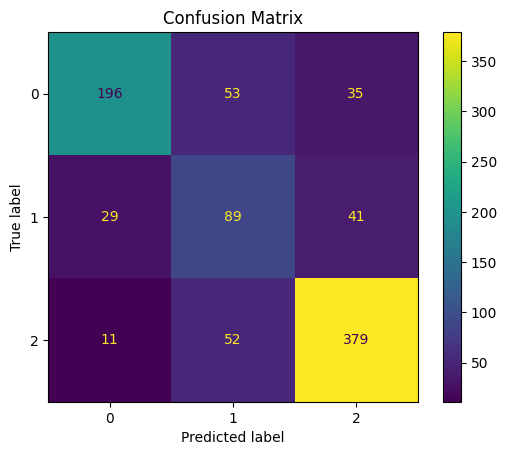

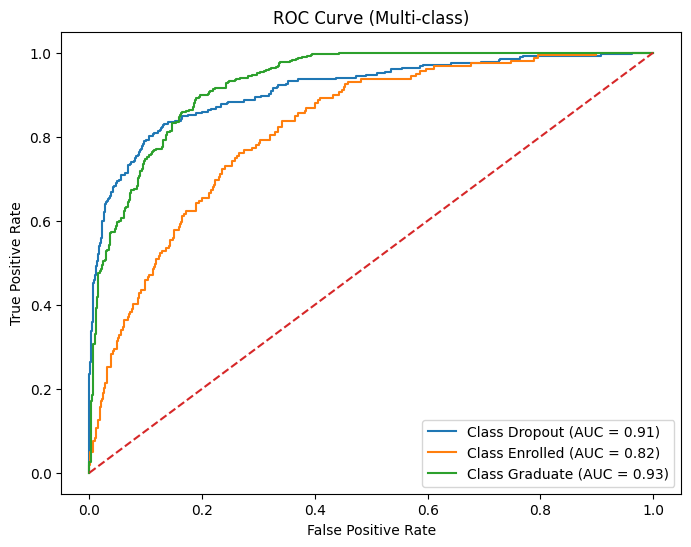

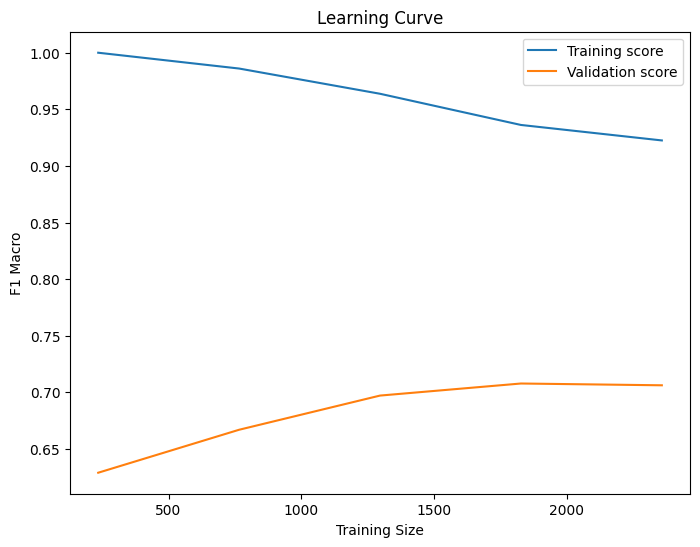

In [ ]:
rf_base_unscaled = RandomForestExperiment(use_scaler=False, use_pca=False, use_lda=False, cv=cv)
rf_base_unscaled.train(X_train, y_train)
rf_base_unscaled.evaluate(X_test, y_test)

##Scaled

/tmp/ipython-input-158607621.py:52: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.y_train = y_train.ravel()


Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best CV F1-macro: 0.7105453202420923
Training time: 58.6413 seconds
Prediction time: 0.077842 seconds

Test Metrics:
Precision (macro): 0.7068226809668351
Recall (macro): 0.7034620521825662
F1-score (macro): 0.7000297000297001
ROC-AUC (OvR): 0.8857282325867512

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.69      0.76       284
    Enrolled       0.45      0.58      0.51       159
    Graduate       0.83      0.84      0.84       442

    accuracy                           0.75       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.77      0.75      0.75       885



/tmp/ipython-input-158607621.py:103: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


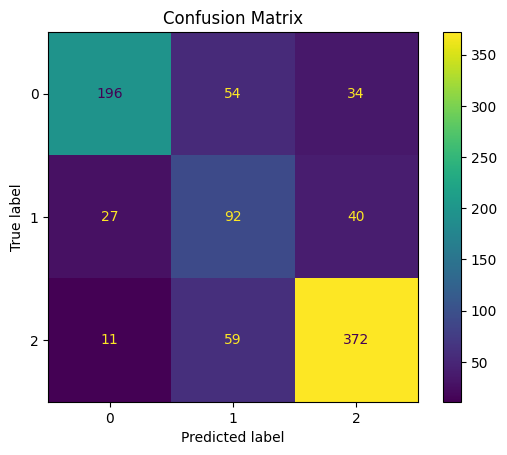

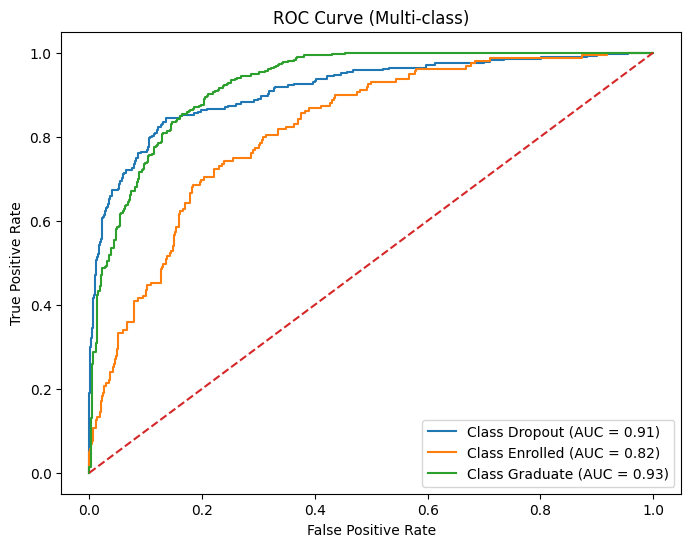

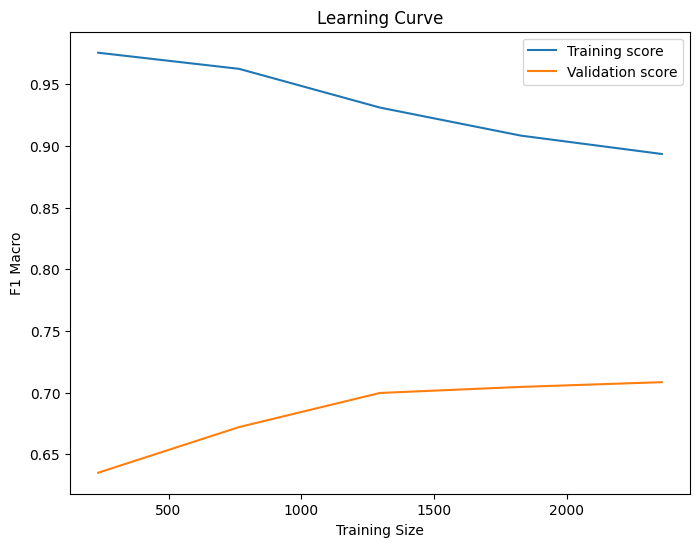

In [ ]:
rf_base = RandomForestExperiment(use_pca=False, use_lda=False, cv=cv)
rf_base.train(X_train, y_train)
rf_base.evaluate(X_test, y_test)

##PCA

/tmp/ipython-input-158607621.py:52: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.y_train = y_train.ravel()


Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best CV F1-macro: 0.671806797479956
Training time: 140.3929 seconds
Prediction time: 0.174050 seconds

Test Metrics:
Precision (macro): 0.6552393000210838
Recall (macro): 0.6475313934318797
F1-score (macro): 0.6504541953169033


/tmp/ipython-input-158607621.py:103: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


ROC-AUC (OvR): 0.8477984734270038

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.78      0.70      0.73       284
    Enrolled       0.40      0.42      0.41       159
    Graduate       0.79      0.83      0.81       442

    accuracy                           0.71       885
   macro avg       0.66      0.65      0.65       885
weighted avg       0.72      0.71      0.71       885



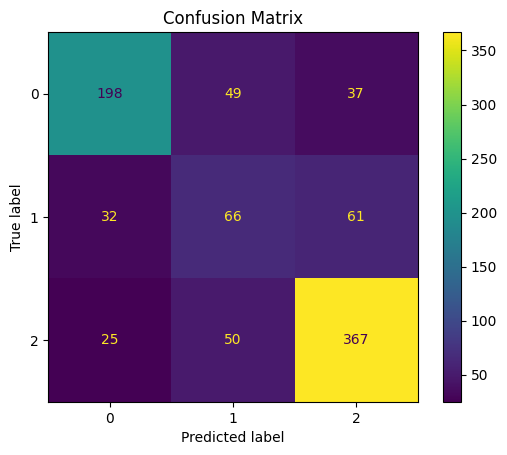

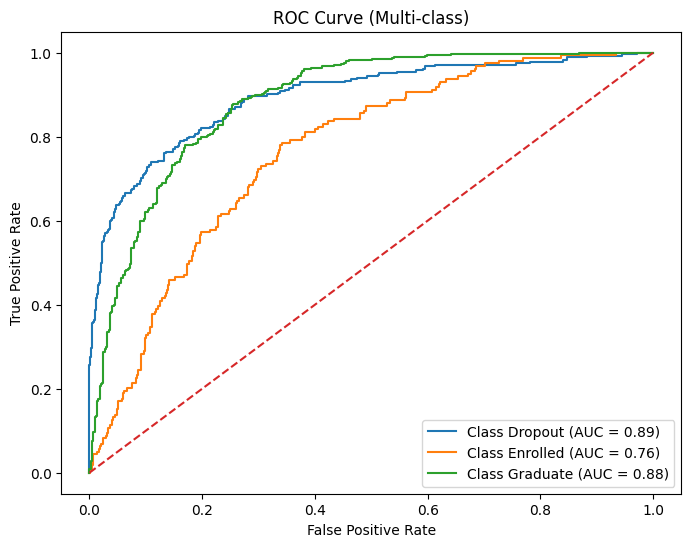

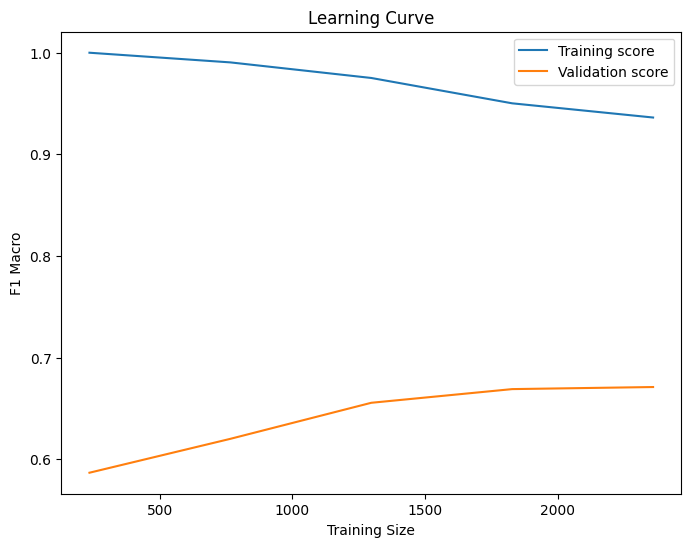

In [ ]:
rf_pca = RandomForestExperiment(use_pca=True, cv=cv)
rf_pca.train(X_train, y_train)
rf_pca.evaluate(X_test, y_test)

##LDA

/tmp/ipython-input-158607621.py:52: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  self.y_train = y_train.ravel()


Best parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best CV F1-macro: 0.6823629574849336
Training time: 52.2044 seconds
Prediction time: 0.042252 seconds

Test Metrics:
Precision (macro): 0.6787946632143945
Recall (macro): 0.6722781503424294
F1-score (macro): 0.668737967368409
ROC-AUC (OvR): 0.8518010028239965

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.70      0.76       284
    Enrolled       0.36      0.52      0.43       159
    Graduate       0.84      0.79      0.82       442

    accuracy                           0.72       885
   macro avg       0.68      0.67      0.67       885
weighted avg       0.75      0.72      0.73       885



/tmp/ipython-input-158607621.py:103: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


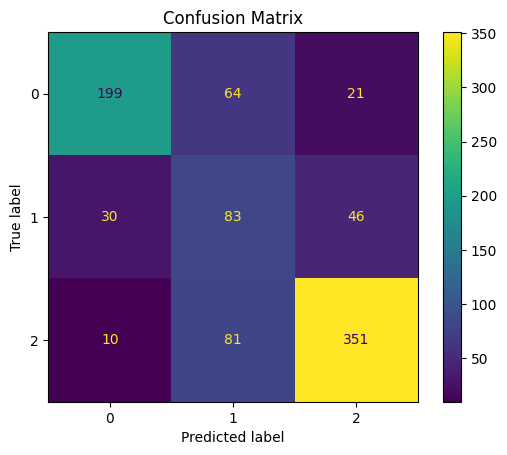

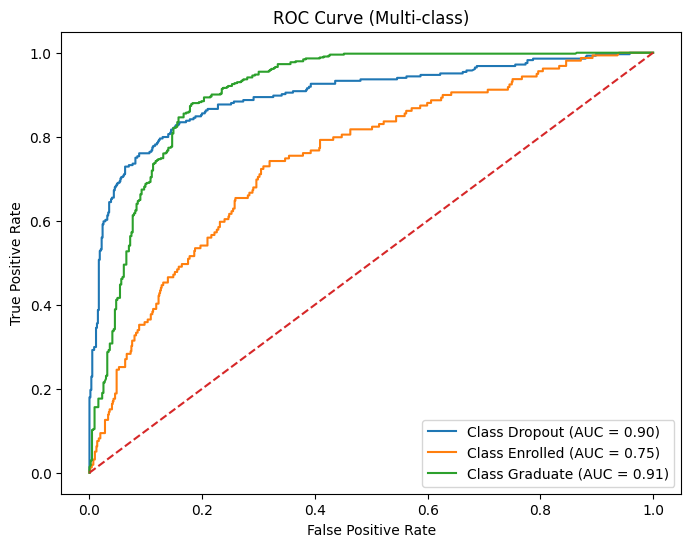

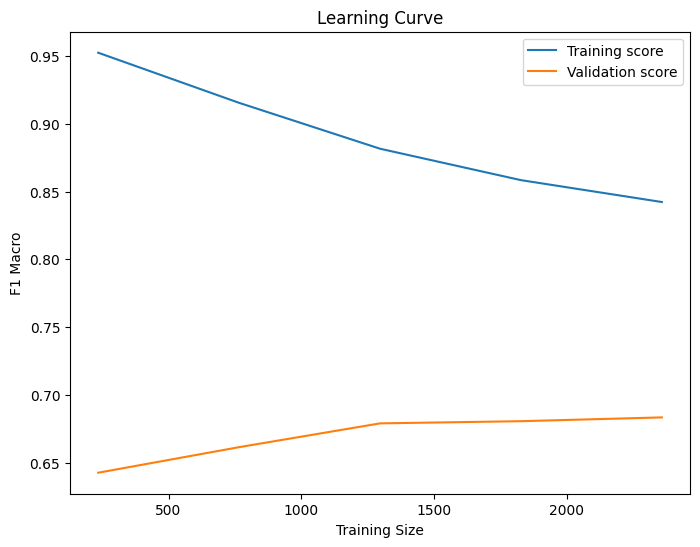

In [ ]:
rf_lda = RandomForestExperiment(use_lda=True, cv=cv)
rf_lda.train(X_train, y_train)
rf_lda.evaluate(X_test, y_test)